<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/mini_batch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [25]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [26]:
#checking the shape of my dataset
df.shape

(20, 3)

In [27]:
#checking if there is any missingdata in my dataset
df.isna().any()

,0
area,False
bedrooms,False
price,False


In [28]:
#my dataset needs to be scaled please
#I will create the obect from the class

sx = MinMaxScaler()
sy = MinMaxScaler()

In [29]:
#as a rule of thumb , I love to visualize what I am doing
X = df.drop('price', axis = 1)
X.head()

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
X.shape

(20, 2)

In [32]:
#i made a very grave error here and that was so stupid of m#i wrote the code like this  scaled_X = sx.fit_transform([[X]]) and it was flagged by the computer becasue my dataset is already a 2d dataframe

scaled_X = sx.fit_transform(X)
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [33]:
y = df['price']
y.head()

,price
0,39.07
1,120.00
2,62.00
3,75.00
4,51.00


I realized another error I made that is so silly, in the code cell below I was trying to do this

scaled_y = sy.fit_transform([y])

while i had initially done y = df['price']

but thats not how the stuff work , it works differently i needed to turn the price from a series into a dataframe technically , you cannot fit_transform a series



In [42]:
y = df[['price']]
y.head()

,price
0,39.07
1,120.00
2,62.00
3,75.00
4,51.00


In [41]:
type(y)

pandas.core.frame.DataFrame

In [43]:
scaled_y = sy.fit_transform(y)
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [44]:
#I like testing my code before I put it into the function so I can see how it performs
w = np.ones(shape = (X.shape[1]))
w

array([1., 1.])

In [45]:
#I like testing my code before I put it into the function so I can see how it performs
n = X.shape[0]
n

20

In [68]:
#I like testing my code before I put it into the function so I can see how it performs
random_index = np.random.permutation(20)
random_index

array([ 3, 10, 16, 18,  5,  7,  4,  1,  6, 11,  2, 12, 17,  9,  0, 14, 19,
        8, 15, 13])

In [70]:
#I like testing my code before I put it into the function so I can see how it performs
X_tmp = scaled_X[random_index]
X_tmp

array([[0.24862069, 0.5       ],
       [0.34482759, 0.5       ],
       [0.13103448, 0.5       ],
       [0.67931034, 0.5       ],
       [0.12758621, 0.25      ],
       [0.86206897, 0.75      ],
       [0.13793103, 0.25      ],
       [0.62068966, 0.75      ],
       [0.6662069 , 0.75      ],
       [0.68448276, 0.75      ],
       [0.22068966, 0.5       ],
       [0.06896552, 0.25      ],
       [0.25517241, 0.5       ],
       [1.        , 1.        ],
       [0.08827586, 0.25      ],
       [0.5       , 0.5       ],
       [0.        , 0.        ],
       [0.17586207, 0.5       ],
       [0.12931034, 0.25      ],
       [0.10344828, 0.25      ]])

In [71]:
#I like testing my code before I put it into the function so I can see how it performs
y_tmp = scaled_y[random_index]
y_tmp

array([[0.31851852],
       [0.37037037],
       [0.11851852],
       [0.51851852],
       [0.04444444],
       [0.91111111],
       [0.14074074],
       [0.65185185],
       [0.76296296],
       [0.8       ],
       [0.22222222],
       [0.04444444],
       [0.20740741],
       [1.        ],
       [0.05237037],
       [0.51111111],
       [0.        ],
       [0.13333333],
       [0.07407407],
       [0.05925926]])

In [72]:
#I like testing my code before I put it into the function so I can see how it performs
scaled_X.shape

(20, 2)

In [73]:
#I like testing my code before I put it into the function so I can see how it performs
w.shape

(2,)

In [76]:
#I like testing my code before I put it into the function so I can see how it performs
np.dot(w,scaled_X.T).shape

(20,)

In [104]:
def mini_batch_gradient_descent(X , y , epochs, batch_size ):
  rate = 0.01
  bias  = 0
  w = np.ones(shape = (X.shape[1]))
  n = X.shape[0]
  cost_list = []
  epoch_list = []

  if batch_size >= n:
    batch_size = n
  for i in range(epochs):
    random_index = np.random.permutation(n)
    X_tmp = X[random_index]
    y_tmp = y[random_index]

    for j in (0, n, batch_size):
     Xj =  X_tmp[j:j+batch_size]
     yj =  y_tmp[j:j+batch_size]

     y_predicted = np.dot(w,Xj.T) + bias
     loss = np.mean(np.square(yj-y_predicted))

     wd =  -(2/n) * np.dot((yj-y_predicted),Xj)
     bias_d = -(2/n) * np.sum(yj-y_predicted)

     w = w - (wd * rate)
     bias = bias  - (bias_d * rate)

    if i % 10 == 0 :
      cost_list.append(loss)
      epoch_list.append(i)

  return w, bias, loss , cost_list, epoch_list







In [105]:
w, bias, loss , cost_list, epoch_list = mini_batch_gradient_descent(scaled_X ,scaled_y.flatten() , 1000, 5 )
w, bias, loss

(array([0.70705344, 0.67510072]), -0.2334063721945583, 0.007026938008175153)

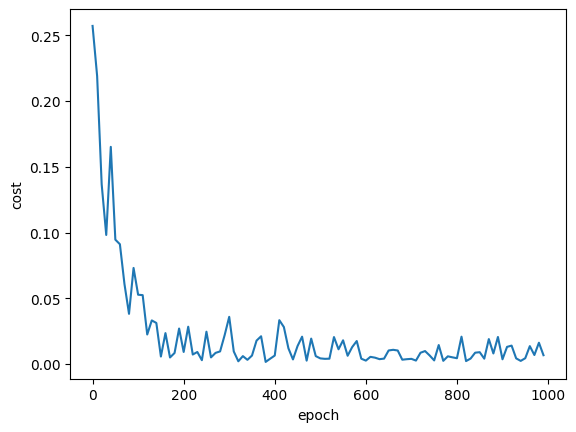

In [106]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [107]:
df.columns

Index(['area', 'bedrooms', 'price'], dtype='object')

In [108]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [111]:
#I like testing my code before I put it into the function so I can see how it performs
sx.transform([[2600, 4]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.62068966, 0.75      ])

In [123]:
def predict(area, bedrooms,w, bias):
  b = sx.transform([[area, bedrooms]])[0]
  scaled_price = ( w[0] * b[0] ) + ( w[1] * b[1] ) + bias
  price = sy.inverse_transform([[scaled_price]])[0][0]
  return price



In [125]:
predict(2600, 4, w, bias)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.09028993298801